In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/census_income.csv",skipinitialspace = True) # Importing the data, and striping the white space

In [3]:
df.head() # Checking the first five elements of the data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail() # Checking the last five elements of the data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.shape # We have 32560 rows, and 15 columns

(32560, 15)

In [6]:
df.info() # Checking basic information of the data frame, we have no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum() # Confirming that we have no null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df.nunique() # Checking unique variables in each of te columns

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
df.columns # Name of the coulmns present

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
df['Income'].value_counts() # Income is our target variable, seems like we have an imbalanced class. we will deal with this in a later step


<=50K    24719
>50K      7841
Name: Income, dtype: int64

In [11]:
df['Workclass'].unique() # Unique variables in the 'Work class', as we can observe we have a '?' here.


array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
df['Occupation'].unique() # Unique variables in the 'Occupation', as we can observe we have a '?' here.

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [13]:
df['Native_country'].unique() # Unique variables in the 'Native country', as we can observe we have a '?' here.

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [14]:
df['Workclass'].value_counts()['?'] # Counting the value of '?' in work class

1836

In [15]:
df['Occupation'].value_counts()['?'] # Counting the value of '?' in Occupation

1843

In [16]:
df['Native_country'].value_counts()['?'] # Counting the value of '?' in native country

583

In [17]:
for cols in df.select_dtypes(exclude=np.number).columns:
    df[df == '?'] = np.nan
    df[df == ' ?'] = np.nan
# Removing the '?' data with NaN as it is not useful

In [18]:
df.dtypes # These are the data types we have

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

### Performing EDA

Checking kde of each colums 

<Figure size 432x288 with 0 Axes>

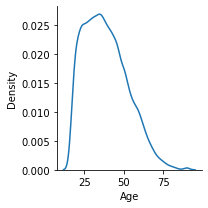

<Figure size 432x288 with 0 Axes>

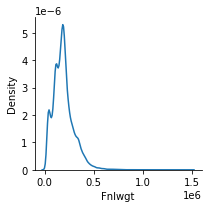

<Figure size 432x288 with 0 Axes>

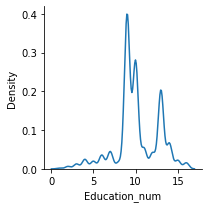

<Figure size 432x288 with 0 Axes>

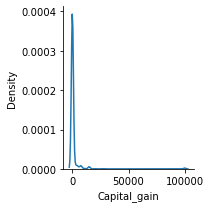

<Figure size 432x288 with 0 Axes>

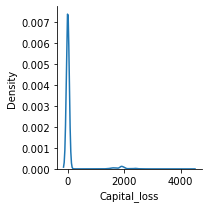

<Figure size 432x288 with 0 Axes>

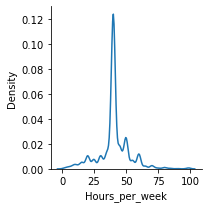

In [19]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=3)
    plt.show()

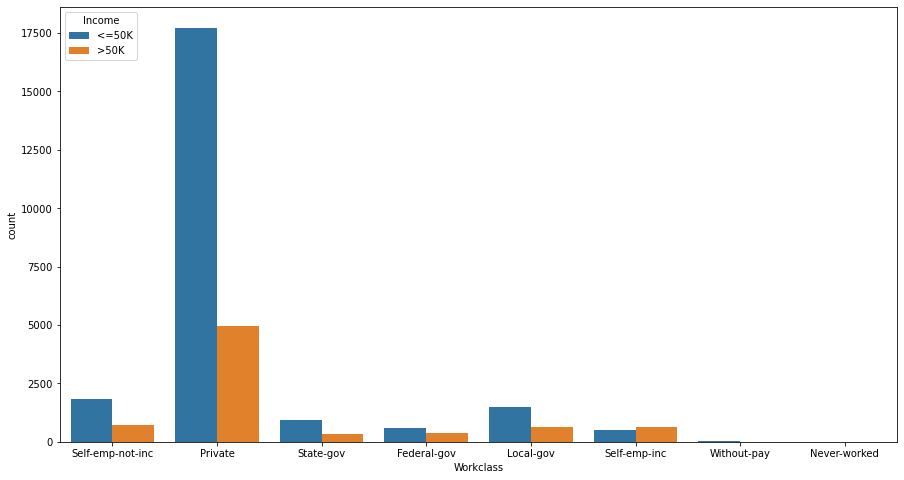

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x= df['Workclass'], hue=df['Income']);

We can observe that,  self employed is the only work class in which a majority of people make more than 50K USD per year

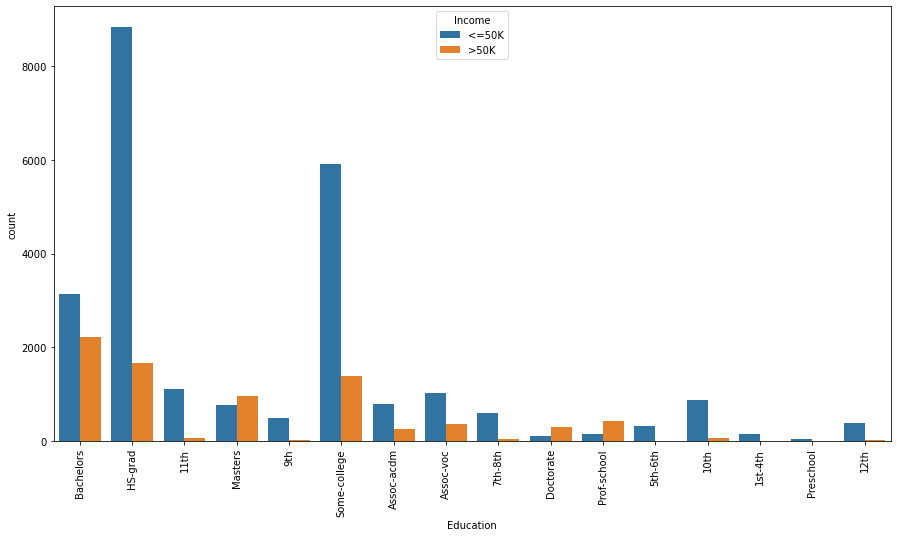

In [21]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = df, x = df['Education'], hue = df['Income'])
ax.tick_params(axis='x', rotation=90)

We can observe that,  people who have a higher degree also have a higher proportion of people who earn >50K which means the more educated someone is, the more likely they are to earn more money.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

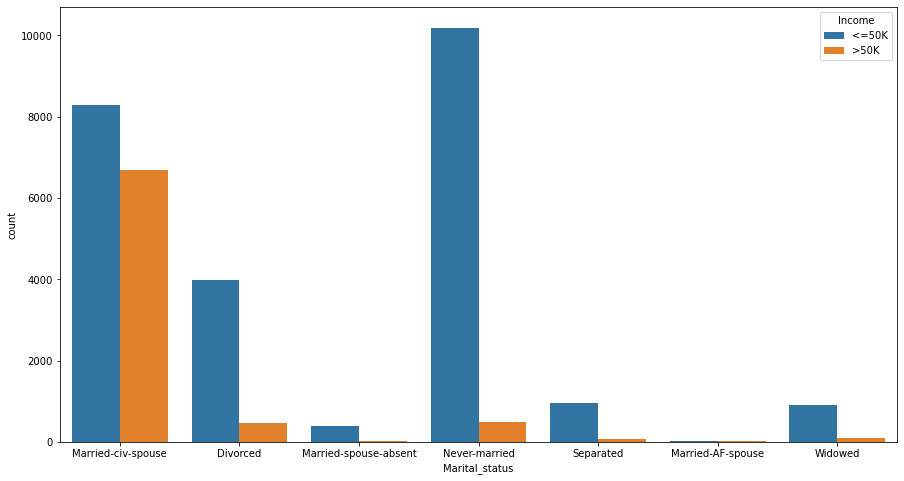

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Marital_status'], hue=df['Income'])

We can observe that,  married people have a higher chance of earning >50K USD

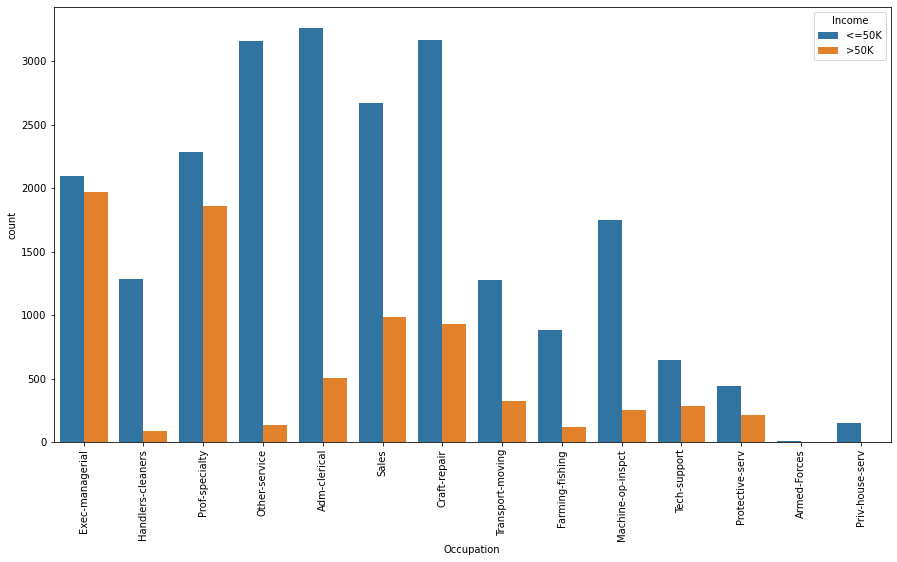

In [23]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = df, x = df['Occupation'], hue=df['Income'])
ax.tick_params(axis='x', rotation=90)

We can observe the distributuon between different occupations.

<AxesSubplot:xlabel='Relationship', ylabel='count'>

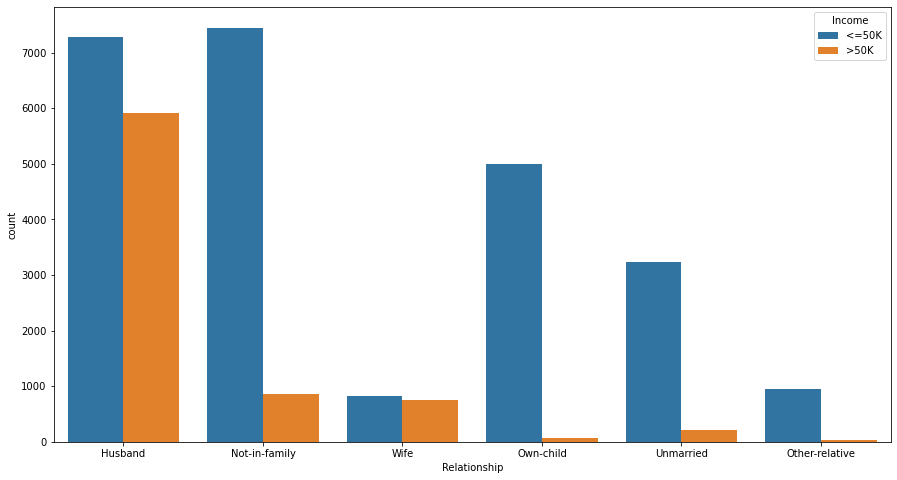

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Relationship'], hue=df['Income'])

We can observe that, half the wifes earn >50K USD, people who are a unmarried have a hugh proportion earning <=50K

<AxesSubplot:xlabel='Race', ylabel='count'>

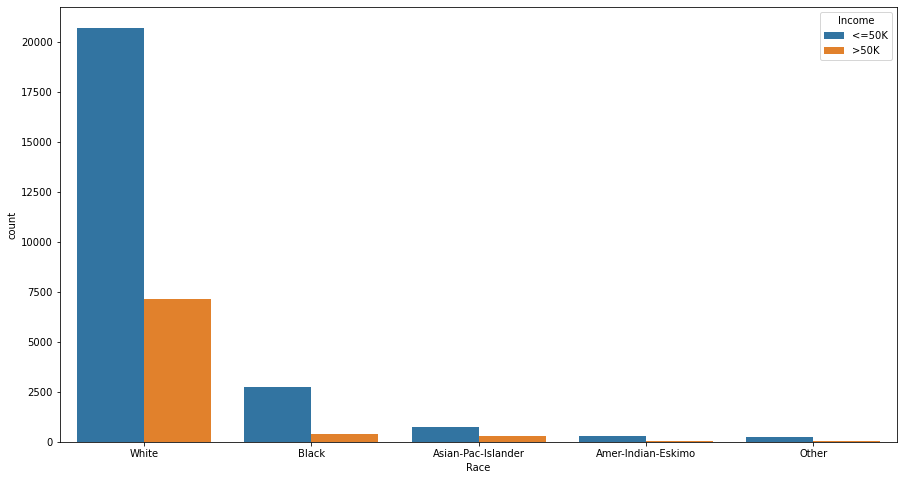

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Race'], hue=df['Income'])

We can observe that,  proprtionally, a white person is more likely to earn >50K compared to all other ethnic groups

<AxesSubplot:xlabel='Sex', ylabel='count'>

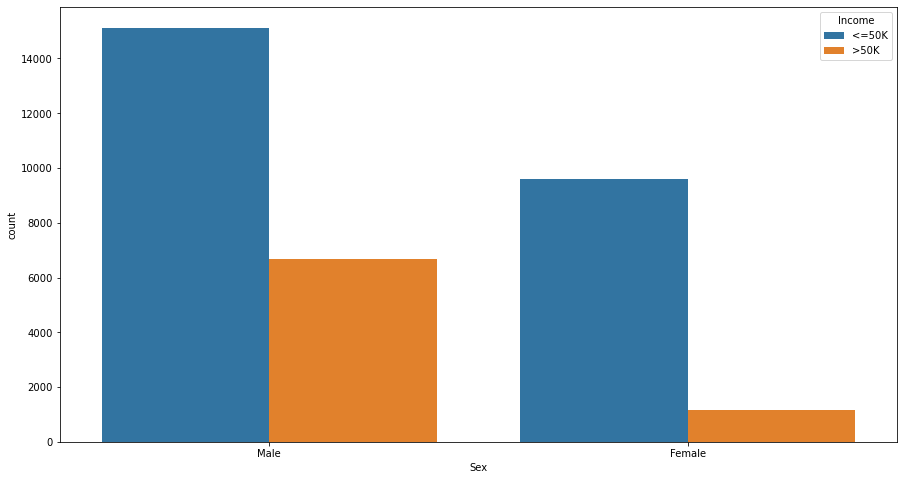

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Sex'], hue=df['Income'])

We can observe that,  we have a higher proportion of males earnign >50K compared to females.

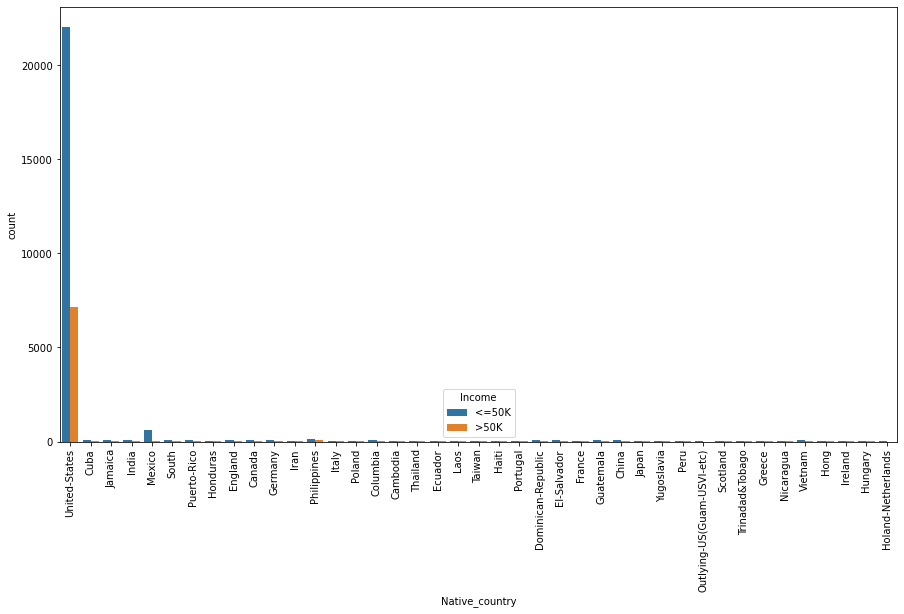

In [27]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data = df, x = df['Native_country'], hue=df['Income'])
ax.tick_params(axis='x', rotation=90)

More than 90% of the data is based on United states here, which will bias the results for people from small minorities.

<AxesSubplot:xlabel='Income', ylabel='count'>

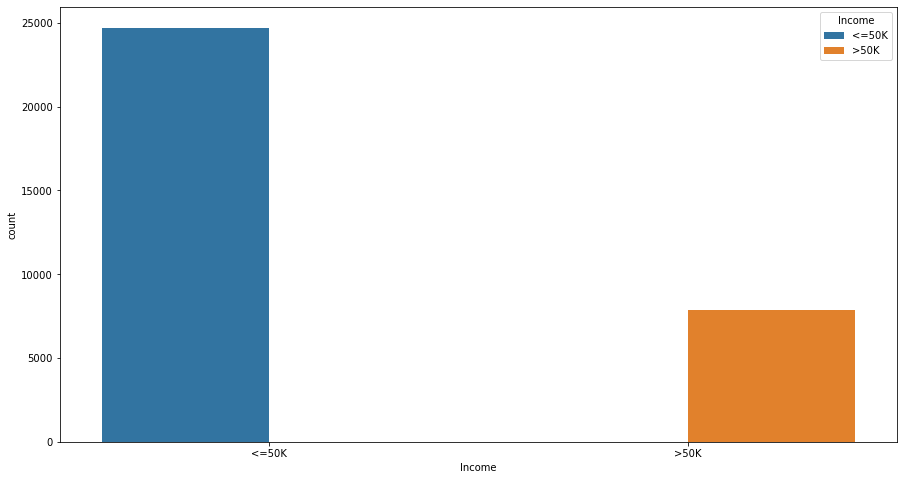

In [28]:
plt.figure(figsize=(15,8))
sns.countplot(data = df, x = df['Income'], hue=df['Income'])

We can observe that,  around 25% of the people earn more than 50K, while 75% of the population earn <=50 K

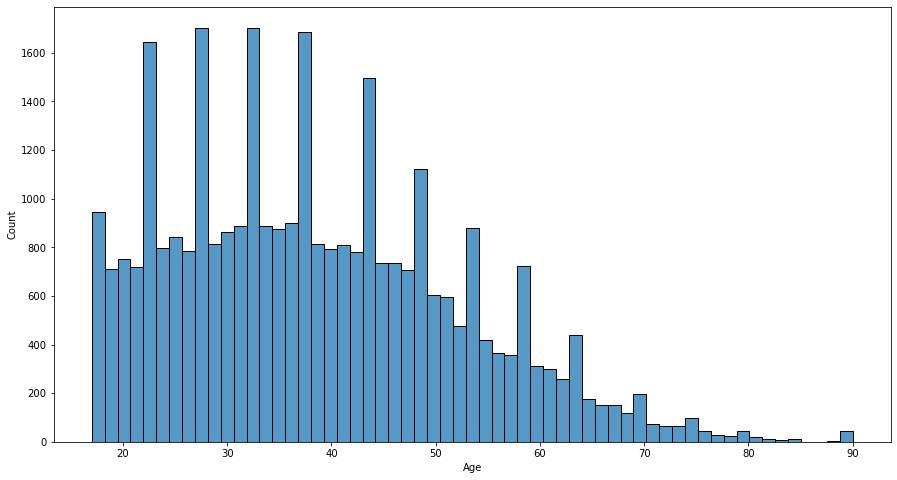

In [29]:
plt.figure(figsize=(15,8))
sns.histplot(df['Age']);

Plotting the age distribution

#### Uni-variate analysis

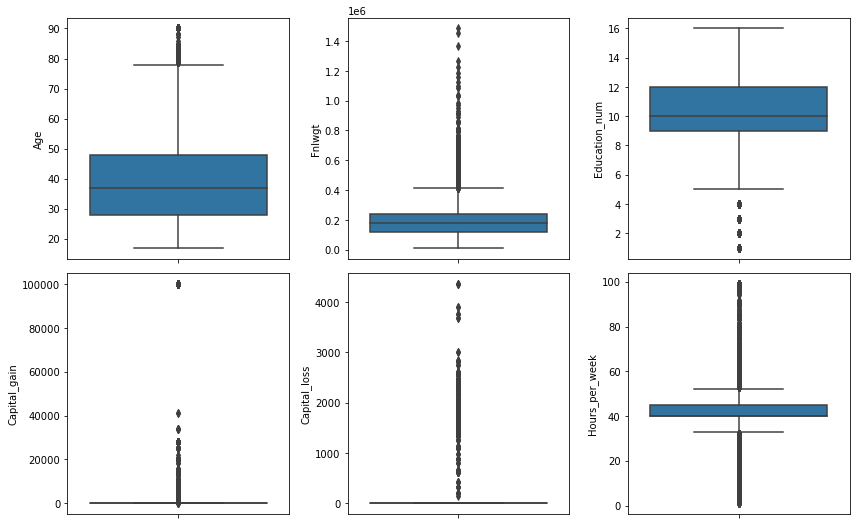

In [30]:
numerical_features = df.select_dtypes(exclude=['object']).copy()
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(5,3,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

#### Bi-variate analysis

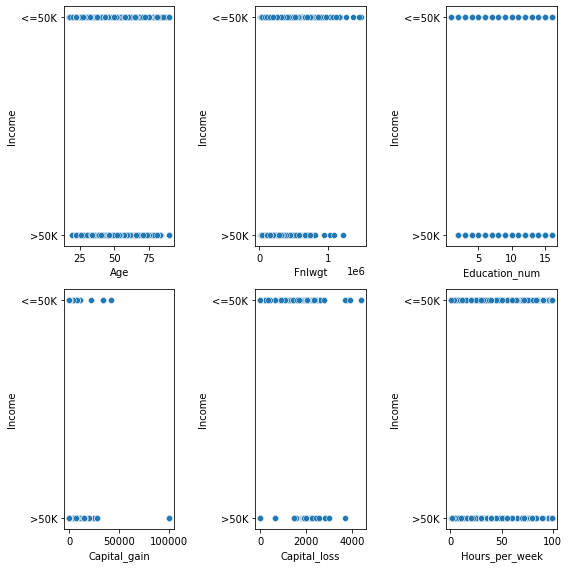

In [31]:
fig = plt.figure(figsize=(8,8))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(2, 3, i+1)
    sns.scatterplot(data = df, x= numerical_features.iloc[:, i],y=df['Income'])
plt.tight_layout()
plt.show()

#### Multi-variate analysis

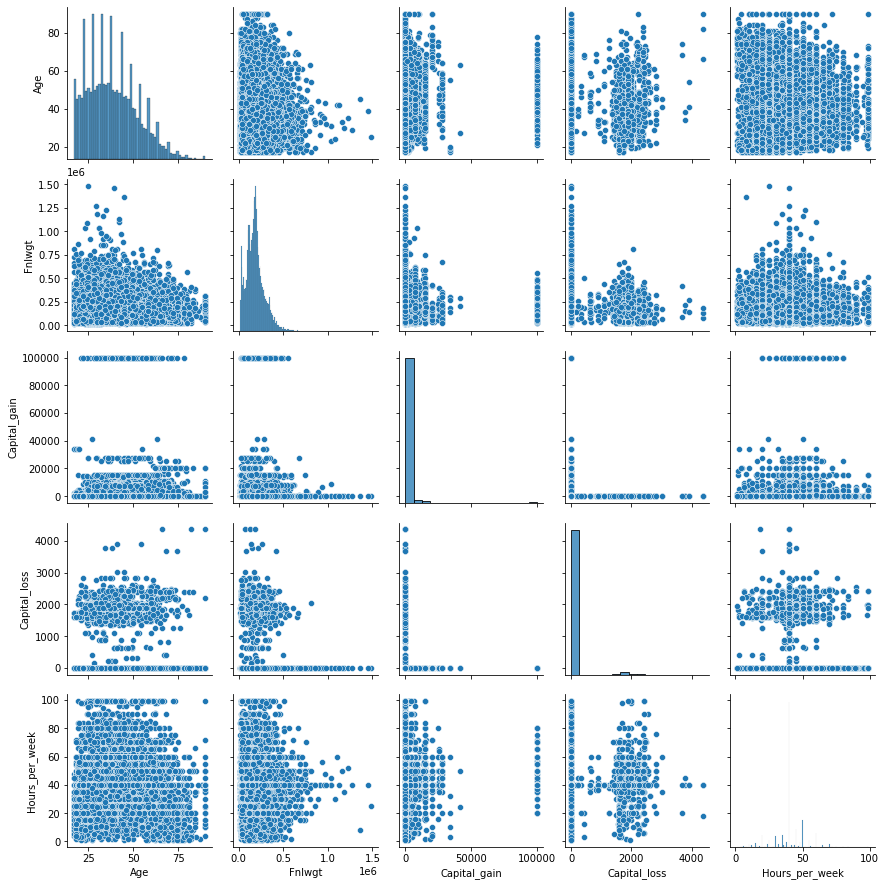

In [32]:
cont_col= ['Age', 'Fnlwgt', 'Capital_gain','Capital_loss', 'Hours_per_week'] 
sns.pairplot(df[cont_col])
plt.show()

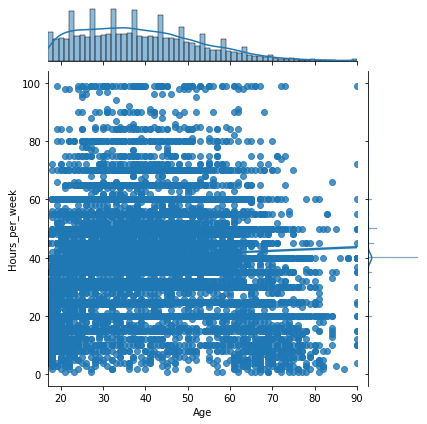

In [33]:
sns.jointplot(x=df.Age,y=df.Hours_per_week, kind = "reg")   
plt.show()

No co-relation between age and hours per week

In [34]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [35]:
df['Income'] = df['Income'].map({'<=50K': 0, '>50K': 1}) # Converting Income to a binary variavle

No handles with labels found to put in legend.


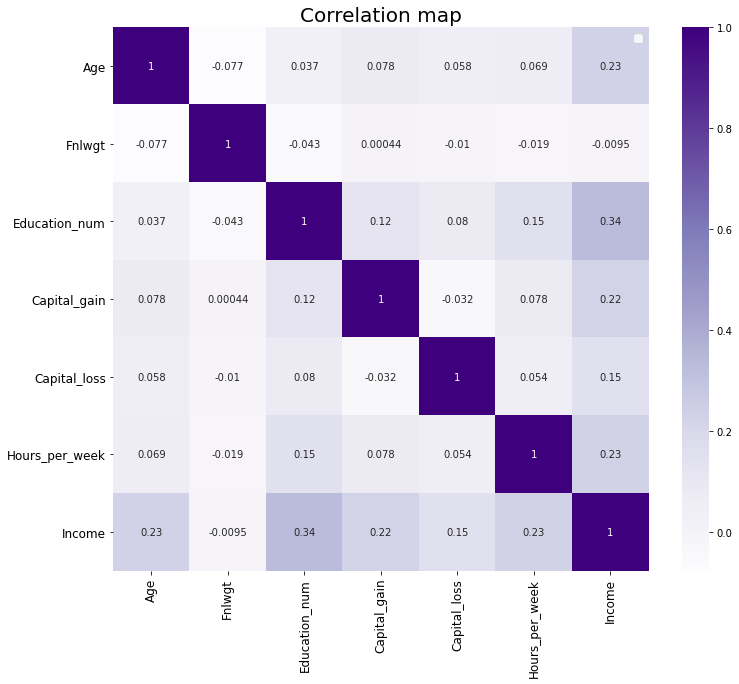

In [36]:
plt.figure(figsize = (12,10))
plt.title("Correlation map", fontsize = 20)
sns.heatmap(df.corr(), cmap = 'Purples', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 0)
plt.legend(fontsize=12)

We can observe that no signle variable is either highly co-related to our target variable income.

In [37]:
df.drop(['Education_num'], axis = 1, inplace = True) # Dropping the column as it is useless

In [38]:
df['Education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['Race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

# Simplifying the data by merging minorities as one

In [39]:
df.describe() # Basic statisctics about the data

,Age,Fnlwgt,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000,1.000000


#### Encoding the catrgorical data

In [40]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols = ['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex'], handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [41]:
#Fit and transform Data
data_encoded = encoder.fit_transform(df)
data_encoded

,Age,Workclass_Self-emp-not-inc,Workclass_Private,Workclass_State-gov,Workclass_Federal-gov,Workclass_Local-gov,Workclass_nan,Workclass_Self-emp-inc,Workclass_Without-pay,Workclass_Never-worked,...,Relationship_Other-relative,Race_White,Race_ Other,Sex_Male,Sex_Female,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,0,13,United-States,0
1,38,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,0,40,United-States,0
2,53,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0,0,40,United-States,0
3,28,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0,0,40,Cuba,0
4,37,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0,0,38,United-States,0
32556,40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,0,40,United-States,1
32557,58,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0,0,40,United-States,0
32558,22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,0,20,United-States,0


### Preparing data for training model

In [42]:
X = data_encoded.drop(['Income','Native_country'],axis=1)
y = data_encoded['Income']

As the data was imbalanced, I will use SMOTE to balance the income to remove bias

In [43]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

<AxesSubplot:xlabel='Income', ylabel='count'>

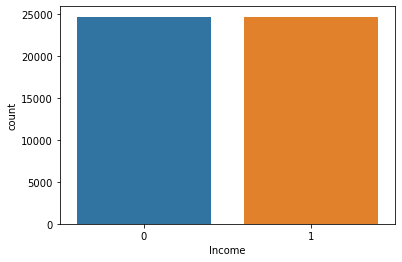

In [44]:
sns.countplot(x=yo)

Slpitting the data

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 5)


In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Standardising the data

In [47]:
print(X_train.shape, X_test.shape) # Checking final shape before proceeding

(39550, 55) (9888, 55)


In [48]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [49]:
from sklearn.linear_model import LogisticRegression
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn                        import metrics, svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report # Importing required libraries

#### Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=1)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.8741909385113269

In [51]:
scr = cross_val_score(dtr, X,y, cv=5)
print(scr.mean())

0.8110257985257985


#### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(random_state=5)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.9004854368932039

In [53]:
scr = cross_val_score(rfr, X,y, cv=5)
print(scr.mean())

0.853531941031941


#### Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
llr = LogisticRegression()
llr.fit(X_train, y_train)
y_pred_rfr = llr.predict(X_test)
llr.score(X_test, y_test)

0.8362661812297735

In [55]:
scr = cross_val_score(llr, X,y, cv=5)
print(scr.mean())

0.7973587223587224


#### K-Neighbors Classifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn.score(X_test, y_test)

0.8417273462783171

In [57]:
scr = cross_val_score(knn, X,y, cv=5)
print(scr.mean())

0.7970208845208845


#### Gradient Boosting Classifier

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gba = GradientBoostingClassifier(random_state=1)
gba.fit(X_train, y_train)
y_pred_gba = gba.predict(X_test)
gba.score(X_test,y_test)

0.9058454692556634

In [59]:
scr = cross_val_score(gba, X,y, cv=5)
print(scr.mean())

0.8653255528255528


## PCA

I performed PCA, but selection 32-42  components (out of a total 47 components) didn't improve the score (containing 90% and 99.9997% of the data respectively).
So I have decided to remove it in the final model.

### Hyper paramter tuning


As Gradient Boosting classifier has achieved the highest accuracy and cross val score, I will be further tuning it.

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters = { 'loss' : ['deviance','exponential'],
               'learning_rate' : [0.1,0.2], 
              'n_estimators': [100,150],
              'max_depth':[3,4]
} # Selected hyper parameters

In [62]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5) # Tuning with 5 corss validations

In [63]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 4], 'n_estimators': [100, 150]})

In [64]:
GCV.best_params_

{'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 150}

In [65]:
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 5)

In [66]:
mod = GradientBoostingClassifier(learning_rate = 0.2,loss = 'exponential', max_depth = 4, n_estimators = 150 )

mod.fit(X_train, y_train)
mod_pred = mod.predict(X_test)
mod.score(X_test, y_test)


0.9141383495145631

In [67]:
pd.DataFrame(confusion_matrix(y_test, mod_pred), columns=['Predicted Yes', "Predicted No"], index=['Actual Yes', 'Actual No'])

,Predicted Yes,Predicted No
Actual Yes,4608,320
Actual No,529,4431


## Plotting AUROC 

In [68]:
y_score = mod.predict_proba(X_test)[:,1]

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

In [71]:
roc_accuracy = roc_auc_score(y_test, y_score)

In [72]:
print('roc_auc_score for DecisionTree: ', roc_accuracy)

roc_auc_score for DecisionTree:  0.9775952547326665


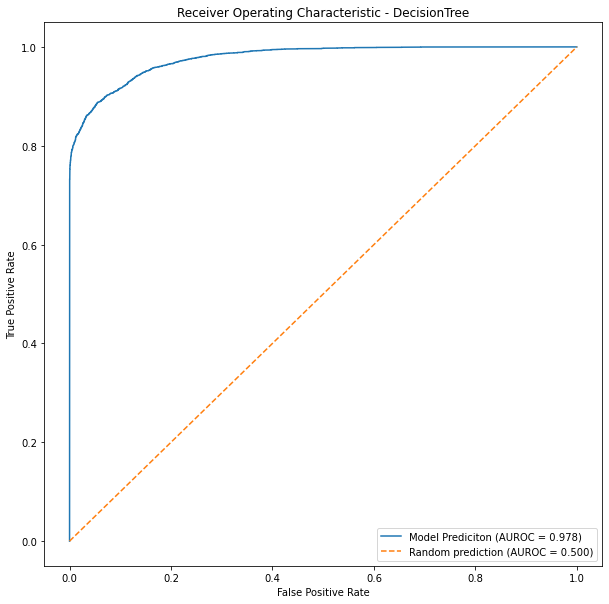

In [73]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate, true_positive_rate, label ='Model Prediciton (AUROC = %0.3f)' %roc_accuracy)
plt.plot([0, 1], ls="--", label = 'Random prediction (AUROC = %0.3f)' %0.500)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


### Saving the model

In [74]:
import joblib
joblib.dump(mod,"Census Income.pkl")

['Census Income.pkl']